In [35]:
import h5py
from numpy import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.size'] = 20
sns.set_theme(context="notebook")
from tqdm import tqdm

# Grinstead and Snell's Introduction to Probability?
# Cebulla, 2005: https://sci-hub.se/10.1080/14992020400029228
# if further questions: https://sci-hub.se/10.3109/00206090109073118 and https://sci-hub.se/10.3109/14992027.2015.1017659
# Chesnaye, 2019: https://sci-hub.se/10.1080/14992027.2019.1625486
# if further questions, Chesnaye,2019 CGST: https://sci-hub.se/10.1109/TBME.2019.2919696
# Chesnaye, 2019 dataset: https://eprints.soton.ac.uk/417742/

# Ordem dos eletrodos no BD-NIAS:
eletrodos = ['FC','F4','T6','P4','T4','Oz','C4','T5','P3','F7','F3','T3','C3','Fz','Pz','Cz']

In [305]:

print(np.sum(ORD>limiar))
print(SINAL.shape)
print(ORD.shape)
# ORDs
np.any(ORD>limiar)

8
(120, 448)
(120,)


True

In [314]:
# Testes SMSC médio
## Dados
from scipy.fft import fft
exames = ['Ab','An','Bb','Er','Qu','Vi','Sa','Ti','Wr'] # 'Lu','So' retirados pois Njanelas pequeno
#  ['Ab','An','Bb','Er','Lu','So','Qu','Vi','Sa','Ti','Wr']
binsM = [81,83,85,87,89,91,93,95]
binsR = np.arange(0,120,1)
binsR = np.delete(binsR,binsM)
#freq. 81Hz,83,85,87,89,91,93,95Hz
i=0


for ex in exames:
    caminho = 'C:/Users/alexa/Desktop/sync/NIAS_online/IC21/bd/'+str(ex)+'40dB.mat'
    x = h5py.File(caminho, 'r')['x']
    x = x[0,:,:] # Pega valores do primeiro eletrodo
    
    Fs = h5py.File(caminho, 'r')['Fs'] # alguns estão em 1750 Hz

    x2 = np.reshape(x, (x.shape[1],x.shape[0]))

    # print(x.shape)
    print(x2.shape)
    # x2 = x
    x2 = x2-np.mean(np.mean(x2))

    print('Exame', ex)

    ## Parâmetros
    Mmin = 2
    Mmax = 450
    Mstep = 2
    listaMs = np.arange(Mmin, Mmax, step=Mstep)
    HITS = np.zeros((120,len(listaMs),len(exames)))

    ORDs= np.zeros((len(listaMs)))

    ## Testes
    for j in tqdm(range(0,len(listaMs)), desc = 'Aplicando testes'):
        M = int(listaMs[j])
        limiar = 1-(5/100)**(1/(M-1))

        SINAL = fft(x2[:,0:M])[0:120,:] # usa apenas primeiros 120 bins

        # Calcula MSC:
        ORD = (np.abs(np.sum(SINAL,axis=1))**2) / (M*np.sum(np.abs(SINAL)**2,axis=1))

        DET = np.where(ORD>limiar,1,0)

        HITS[:,j,i]= DET
        # FP[i,j] = np.sum()/120
        # np.sum(np.where(ORD[binsR]>limiar))
        # np.sum(ORD[binsR]>limiar)/M
        # /M

    # print('Menor FP:',np.round(probDetecT[i,-1]*100,2),'\b%')
    i+=1

FP = np.mean(np.mean(HITS[binsR,:,:],axis = 2),axis=0)
fig = plt.figure('a',(5,8))
sns.boxplot(y = FP*100)

TXD = np.mean(np.mean(HITS[binsM,:,:],axis = 2),axis=0)
# sns.lineplot(x=listaMs,y = np.mean(FP,axis=0)*100, linewidth= 2.3);
# tit = 'FP médio do SMSC no exame '+caminho[-7:-4]
# plt.title(tit,fontsize=24, fontfamily='Garamond');

# plt.xticks(np.arange(np.min(listaMs),np.max(listaMs),4))
# plt.yticks(np.arange(np.min(np.mean(probDetecT,axis=0)*100),np.max(np.mean(probDetecT,axis=0)*100)+0.5,0.5))

# plt.ylabel('Taxa de FP [%]',fontsize=20, fontfamily='Garamond');
# plt.xlabel('Número de Janelas [M =2:2:120]',fontsize=20, fontfamily='Garamond');

# print('Para M = 120, temos FP =',np.round(np.min(np.mean(probDetecT,axis=0)*100),2),'\b%')

(1000, 480)
Exame Ab


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 154.56it/s]


(1000, 480)
Exame An


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 151.81it/s]


(1750, 480)
Exame Bb


Aplicando testes: 100%|██████████| 224/224 [00:02<00:00, 91.76it/s] 


(1000, 480)
Exame Er


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 154.05it/s]


(1000, 480)
Exame Qu


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 152.38it/s]


(1750, 480)
Exame Vi


Aplicando testes: 100%|██████████| 224/224 [00:02<00:00, 91.51it/s] 


(1000, 480)
Exame Sa


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 157.19it/s]


(1000, 480)
Exame Ti


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 153.43it/s]


(1000, 480)
Exame Wr


Aplicando testes: 100%|██████████| 224/224 [00:01<00:00, 158.09it/s]


AxisError: axis 1 is out of bounds for array of dimension 1

<Figure size 500x800 with 0 Axes>

(1000, 480)
Exame Ab


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 153.97it/s]


(1000, 480)
Exame An


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 150.30it/s]


(1750, 480)
Exame Bb


Aplicando testes: 100%|██████████| 225/225 [00:02<00:00, 86.37it/s] 


(1000, 480)
Exame Er


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 152.45it/s]


(1750, 480)
Exame Lu


Aplicando testes: 100%|██████████| 225/225 [00:02<00:00, 91.28it/s] 


(1750, 480)
Exame So


Aplicando testes: 100%|██████████| 225/225 [00:02<00:00, 93.17it/s] 


(1000, 480)
Exame Qu


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 154.63it/s]


(1750, 480)
Exame Vi


Aplicando testes: 100%|██████████| 225/225 [00:02<00:00, 92.30it/s] 


(1000, 480)
Exame Sa


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 157.97it/s]


(1000, 480)
Exame Ti


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 151.67it/s]


(1000, 480)
Exame Wr


Aplicando testes: 100%|██████████| 225/225 [00:01<00:00, 160.66it/s]


<AxesSubplot:>

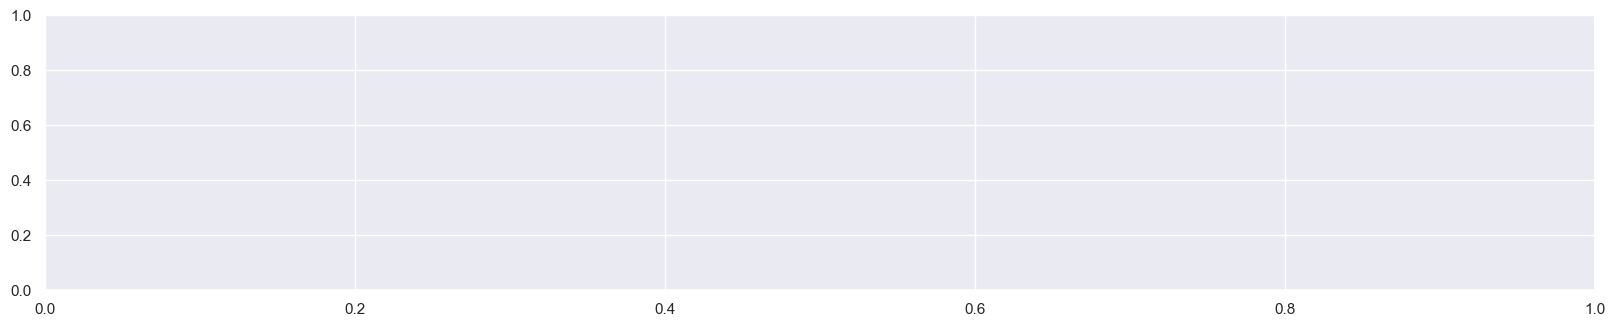

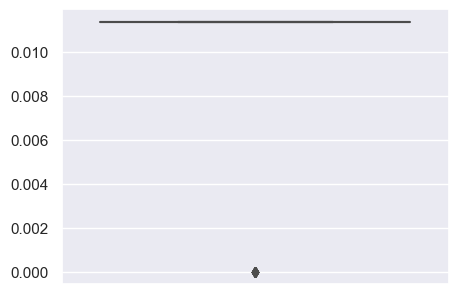

In [320]:
# Testes SMSC médio
## Dados
from scipy.fft import fft
exames = ['Ab','An','Bb','Er','Lu','So','Qu','Vi','Sa','Ti','Wr']
# ['Ab','An','Bb','Er','Qu','Vi','Sa','Ti','Wr'] # 'Lu','So' retirados pois Njanelas pequeno
# ['Ab','An','Bb','Er','Lu','So','Qu','Vi','Sa','Ti','Wr'] # todos
binsM = [81,83,85,87,89,91,93,95]
binsR = np.arange(0,120,1)
binsR = np.delete(binsR,binsM)
#freq. 81Hz,83,85,87,89,91,93,95Hz
i=0


for ex in exames:
    caminho = 'C:/Users/alexa/Desktop/sync/NIAS_online/IC21/bd/'+str(ex)+'40dB.mat'
    x = h5py.File(caminho, 'r')['x']
    x = x[0,:,:] # Pega valores do primeiro eletrodo
    
    Fs = h5py.File(caminho, 'r')['Fs'] # alguns estão em 1750 Hz

    x2 = np.reshape(x, (x.shape[1],x.shape[0]))

    # print(x.shape)
    print(x2.shape)
    # x2 = x
    x2 = x2-np.mean(np.mean(x2))

    print('Exame', ex)

    ## Parâmetros
    Mmin = 2
    Mmax = 452
    Mstep = 2
    listaMs = np.arange(Mmin, Mmax, step=Mstep)
    HITS = np.zeros((120,len(listaMs),len(exames)))

    ORDs= np.zeros((len(listaMs)))

    ## Testes
    for j in tqdm(range(0,len(listaMs)), desc = 'Aplicando testes'):
        M = int(listaMs[j])
        limiar = 1-(5/100)**(1/(M-1))

        SINAL = fft(x2[:,0:M])[0:120,:] # usa apenas primeiros 120 bins

        # Calcula MSC:
        ORD = (np.abs(np.sum(SINAL,axis=1))**2) / (M*np.sum(np.abs(SINAL)**2,axis=1))

        DET = np.where(ORD>limiar,1,0)

        HITS[:,j,i]= DET
        # FP[i,j] = np.sum()/120
        # np.sum(np.where(ORD[binsR]>limiar))
        # np.sum(ORD[binsR]>limiar)/M
        # /M

    # print('Menor FP:',np.round(probDetecT[i,-1]*100,2),'\b%')
    i+=1

plt.subplot(121);
FP = np.mean(np.mean(HITS[binsR,:,:],axis = 2),axis=0);
sns.boxplot(y = FP*100);

plt.subplot(122);
TXD = np.mean(np.mean(HITS[binsM,:,:],axis = 2),axis=0);
sns.boxplot(y = TXD*100);
print('TXD = ',np.round(np.mean(TXD)*100,3),'\b% e FP = ', np.round(np.mean(FP)*100,3),'\b%')

# sns.lineplot(x=listaMs,y = np.mean(FP,axis=0)*100, linewidth= 2.3);
# tit = 'FP médio do SMSC no exame '+caminho[-7:-4]
# plt.title(tit,fontsize=24, fontfamily='Garamond');

# plt.xticks(np.arange(np.min(listaMs),np.max(listaMs),4))
# plt.yticks(np.arange(np.min(np.mean(probDetecT,axis=0)*100),np.max(np.mean(probDetecT,axis=0)*100)+0.5,0.5))

# plt.ylabel('Taxa de FP [%]',fontsize=20, fontfamily='Garamond');
# plt.xlabel('Número de Janelas [M =2:2:120]',fontsize=20, fontfamily='Garamond');

# print('Para M = 120, temos FP =',np.round(np.min(np.mean(probDetecT,axis=0)*100),2),'\b%')

TXD =  1.045% e FP =  0.574%


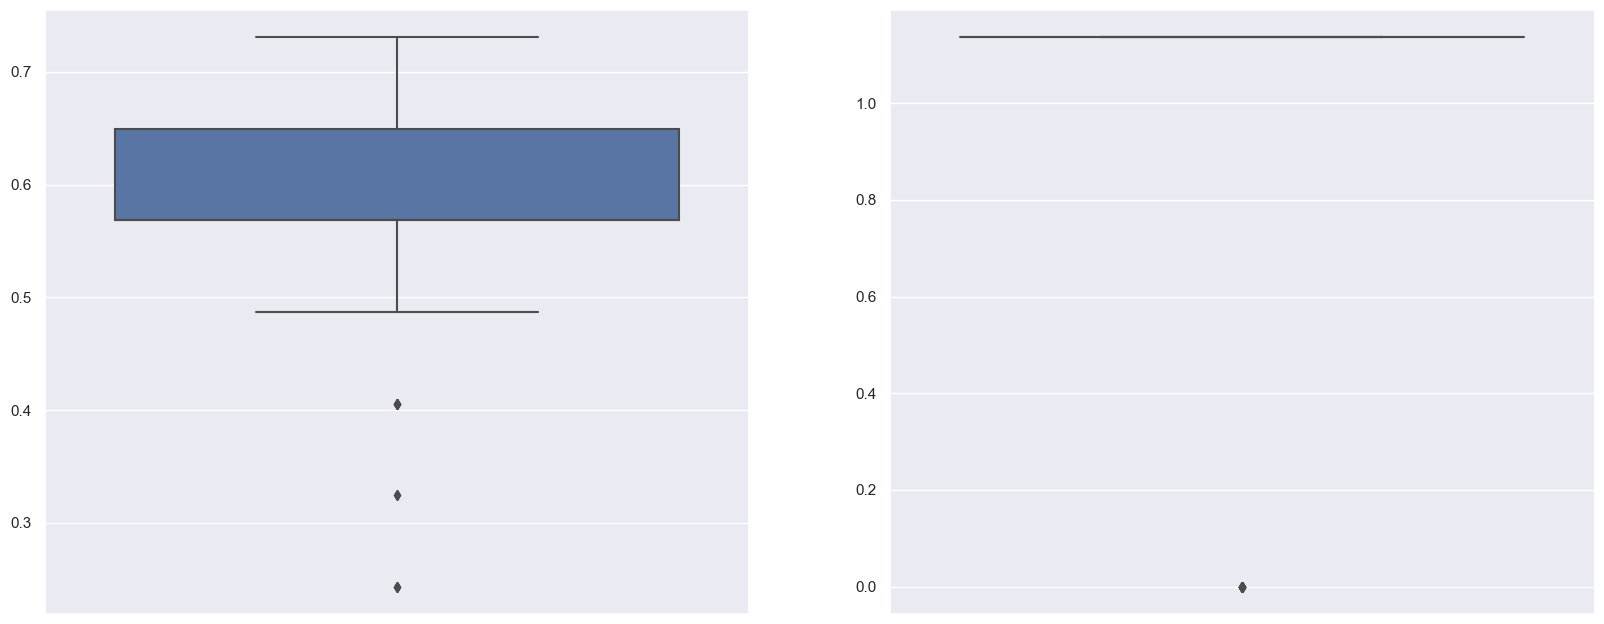

In [335]:
plt.subplot(121);
FP = np.mean(np.mean(HITS[binsR,:,:],axis = 2),axis=0);
sns.boxplot(y = FP*100);

plt.subplot(122);
TXD = np.mean(np.mean(HITS[binsM,:,:],axis = 2),axis=0);
sns.boxplot(y = TXD*100);
print('TXD = ',np.round(np.mean(TXD)*100,3),'\b% e FP = ', np.round(np.mean(FP)*100,3),'\b%')

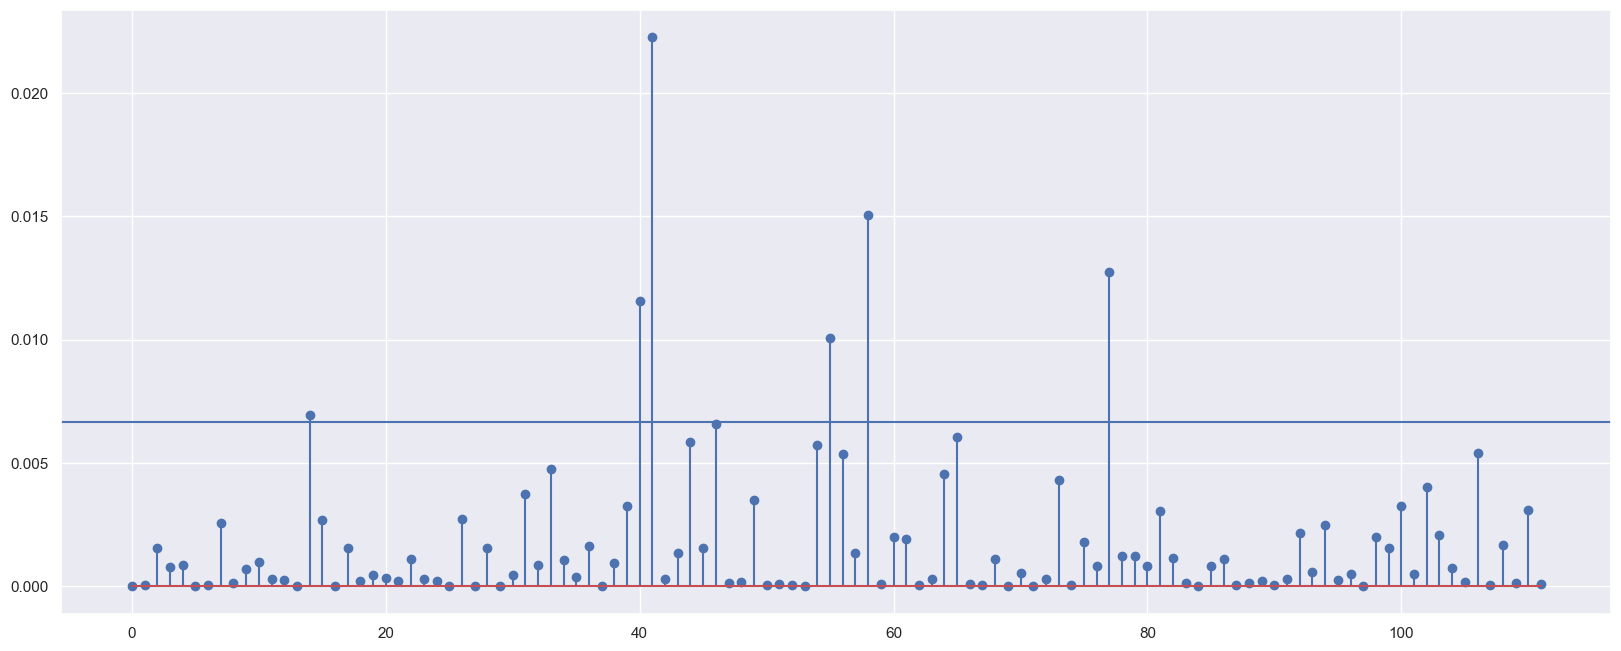

In [289]:
plt.stem(ORD[binsR])
plt.axhline(y = limiar)

<HDF5 dataset "Fs": shape (1, 1), type "<f8">

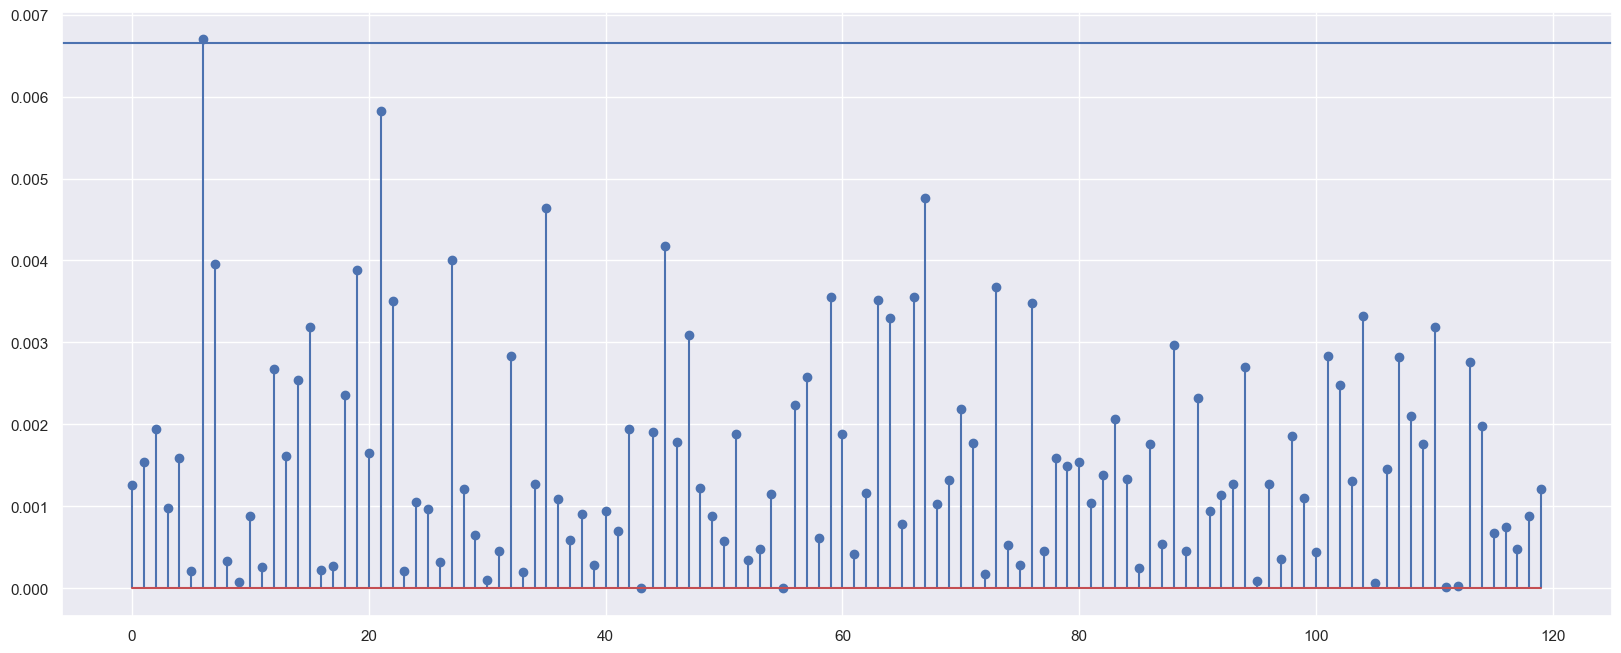

In [204]:
plt.stem(np.abs(SINAL[:,0]))
plt.axhline(y = limiar)